This project explains the basic Coulomb's laws.
\begin{equation}
E = q *\frac{\hat{r}}{r}\\
V = q *\frac{1}{r} \\
V = q * \frac{1}{\sqrt{(x -x')^2 + (y-y')^2}}
\end{equation}

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sns
sns.set()

We use the properties of class, functon and estimate the n-charge system

In [9]:
class Charge:

    '''Data incapsulation'''
    def __init__(self, q, pos): # defined q and position
        self.q = q
        self.pos = pos


    def line(self, x,y): # define for x and y
        '''create a vector from charge to observation point'''
        self.vector = [x-self.pos[0],y-self.pos[1]]
        '''norm of the vector'''
        self.norm = np.sqrt((self.vector[0])**2+(self.vector[1])**2) # denominator term


    def V_point_charge(self, x, y):
        '''recall length'''
        self.line(x,y)
        '''Make sure to exclude source itself'''
        if self.norm >0:
            self.V = self.q/self.norm

            '''if length is zero, set V equal to 0'''
        else:
            self.V = 0
        return self.V

In [10]:
# Let use charge q = 100 C at position x = 5 and y = 5 to find the electric potential

In [12]:
C = Charge(100,[5,5])
for x in range(10):
    for y in range(10):
        print(x,y, "|", C.V_point_charge(x, y)) # First (x,y) pair and second | gives potential at theat pair

0 0 | 14.14213562373095
0 1 | 15.617376188860607
0 2 | 17.149858514250884
0 3 | 18.56953381770519
0 4 | 19.611613513818405
0 5 | 20.0
0 6 | 19.611613513818405
0 7 | 18.56953381770519
0 8 | 17.149858514250884
0 9 | 15.617376188860607
1 0 | 15.617376188860607
1 1 | 17.677669529663685
1 2 | 20.0
1 3 | 22.360679774997894
1 4 | 24.253562503633297
1 5 | 25.0
1 6 | 24.253562503633297
1 7 | 22.360679774997894
1 8 | 20.0
1 9 | 17.677669529663685
2 0 | 17.149858514250884
2 1 | 20.0
2 2 | 23.570226039551585
2 3 | 27.735009811261456
2 4 | 31.622776601683793
2 5 | 33.333333333333336
2 6 | 31.622776601683793
2 7 | 27.735009811261456
2 8 | 23.570226039551585
2 9 | 20.0
3 0 | 18.56953381770519
3 1 | 22.360679774997894
3 2 | 27.735009811261456
3 3 | 35.35533905932737
3 4 | 44.72135954999579
3 5 | 50.0
3 6 | 44.72135954999579
3 7 | 35.35533905932737
3 8 | 27.735009811261456
3 9 | 22.360679774997894
4 0 | 19.611613513818405
4 1 | 24.253562503633297
4 2 | 31.622776601683793
4 3 | 44.72135954999579
4 4 | 7

In [13]:
# To find the total electric potential
def V_total(x, y, charges):
    V = 0
    for C in charges:
        Vp = C.V_point_charge(x, y)
        V  = V+Vp
    return V

### Example
We start taking a collection of charges to find an electric potential at point
x = 4, y=4

In [14]:
sample_charges = [Charge(q = 20, pos = [23,34]),
                  Charge(q = 25, pos = [13,48]),
                  Charge(q = 40, pos = [3,14]),
                  Charge(q = 80, pos = [88,60])]


V_total(x=4, y=4, charges = sample_charges)

5.892446541150622

### Lattice of charges

In [15]:
'''first charge to be at x=1,y=1'''
q = 100

'''Dictionary to collect charges, x and y xoordinates'''
Qd = []

'''List to collect Charge objects'''
charges = []


'''use for loops to construct collection of charges objects'''
for i in range(5):
    for j in range(5):

        '''Collecting charges and their coordinates'''
        Qd.append({"q": q, "x": i*20, "y":j*20})


        '''charge objects are being collected'''
        charges.append(Charge(q , [20*i, 20*j]))

        '''change the sign of charge alternatly'''
        q = -q

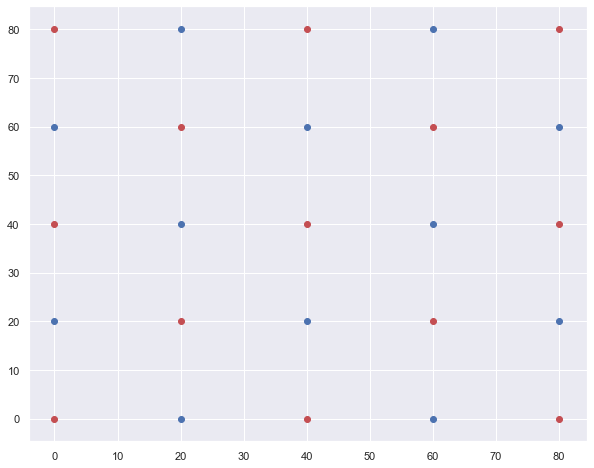

In [17]:
'''Plot the lattice of charges'''

plt.figure(figsize = [10,8])

for item in Qd:

    '''Sctaeer as red dot if charge is positive'''
    if item['q']> 0:
        plt.scatter(item['x'], item['y'], c = 'r')


        '''Scatter as blue dot if charge is negative'''
    else:
        plt.scatter(item['x'], item['y'], c = 'b')          
plt.show()

### Find Electric potential

In [18]:
'''Create X and Y coordinate'''
X = np.arange(-10,110,1)
Y = np.arange(-10,110,1)

'''Initiate vacant V-list of list'''
V = [[0.0 for i in range(len(X))] for j in range(len(Y))]

'''Calculate Electric potential at each x,y coordinate'''
for i,x in enumerate(X):
    for j,y in enumerate(Y):
        v = V_total(x, y, charges)
        V[i][j] = v 

In [20]:
VV = np.array(V)
VV

array([[4.56757626, 4.85433988, 5.15256208, ..., 1.9676212 , 1.90204466,
        1.84132998],
       [4.85433988, 5.19909434, 5.56531782, ..., 1.98223735, 1.91468171,
        1.85231669],
       [5.15256208, 5.56531782, 6.0138754 , ..., 1.99386203, 1.92459953,
        1.86083363],
       ...,
       [1.9676212 , 1.98223735, 1.99386203, ..., 1.52817829, 1.50192297,
        1.47624715],
       [1.90204466, 1.91468171, 1.92459953, ..., 1.50192297, 1.47728094,
        1.45311692],
       [1.84132998, 1.85231669, 1.86083363, ..., 1.47624715, 1.45311692,
        1.43037562]])

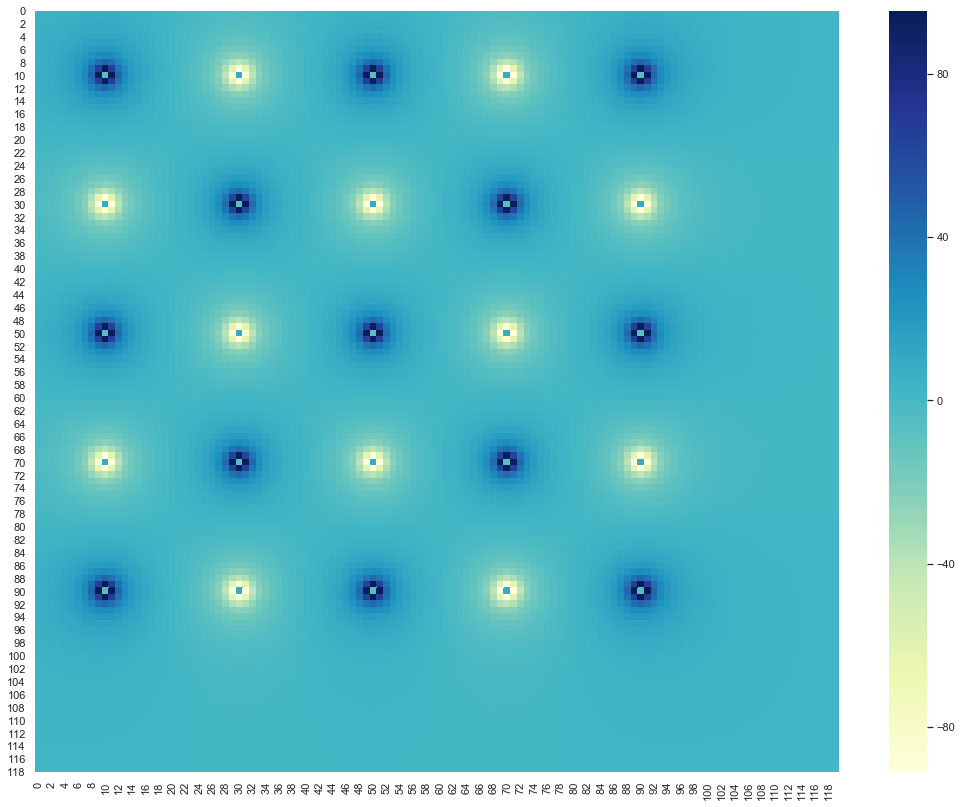

In [21]:
plt.figure(figsize = [18,14])
sns.heatmap(VV,annot=False,cmap='YlGnBu')
plt.savefig('potential-lattice.png')  
plt.show()